# Results plot

In [1]:
%matplotlib inline

# Reading files
import h5py
import toml

# Scientific computing
import numpy as np
import pandas as pd

# Plot
import matplotlib.pyplot as plt; #plt.xkcd()
import seaborn as sns
sns.set()
sns.set_context('paper')

# Other
import os
import subprocess
from random import choice
import time as pytime
from IPython.display import display, clear_output

# Suppress NaturalNameWarning raised by HDFStore
import warnings
import tables
warnings.filterwarnings('ignore', category=tables.NaturalNameWarning)

In [6]:
score = np.array([0.9805, 0.9897, 0.9993,
                  0.9003, 0.9892, 0.9984,
                  0.9143, 0.9961, 0.9899,
                  0.9118, 0.9537, 0.9962])
error = np.array([0.0063, 0.0021, 0.0012,
                  0.0150, 0.0022, 0.0018,
                  0.0113, 0.0012, 0.0052,
                  0.0041, 0.0039, 0.0018])

# High DataFrame
r1 = pd.DataFrame()
r1['Algorithm'] = ['SVC', 'SVC', 'SVC',
                   'KNC', 'KNC', 'KNC',
                   'RFC', 'RFC', 'RFC',
                   'LGB', 'LGB', 'LGB']
r1['Training dataset type'] = ['Standard', 'Augmented', 'Sorted',
                               'Standard', 'Augmented', 'Sorted',
                               'Standard', 'Augmented', 'Sorted',
                               'Standard', 'Augmented', 'Sorted']
r1['Score'] = score+error

# Low DataFrame
r2 = pd.DataFrame()
r2['Algorithm'] = ['SVC', 'SVC', 'SVC',
                   'KNC', 'KNC', 'KNC',
                   'RFC', 'RFC', 'RFC',
                   'LGB', 'LGB', 'LGB']
r2['Training dataset type'] = ['Standard', 'Augmented', 'Sorted',
                               'Standard', 'Augmented', 'Sorted',
                               'Standard', 'Augmented', 'Sorted',
                               'Standard', 'Augmented', 'Sorted']
r2['Score'] = score-error

# Final DataFrame
results = pd.concat([r1, r2])
results.index = range(len(results.index))

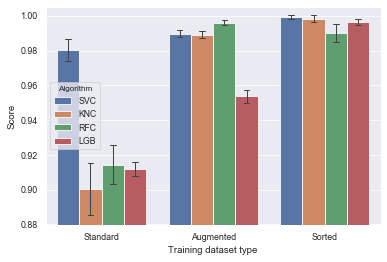

In [21]:
ax = sns.barplot(x='Training dataset type', y='Score', hue='Algorithm', data=results, ci=100, capsize=.05, errwidth=1)
#ax.despine(left=True)
#ax.fig.get_axes()[0].legend(loc='upper left')
ax.set(ylim=(0.88, 1.005))
ax.figure.savefig('model_comparison.pdf')